### External Sources and packages
Below cell lists the external dependencies of this notebook. I have utilized current well known third party libraries made for NLP tasks such as: 
1. nltk https://www.nltk.org/
2. gensim https://radimrehurek.com/gensim/index.html
3. spacy https://spacy.io

I have kept the usage of external librairies varied to keep the tasks simplistic and easy to explain and to demonstrate my understanding and usage of the same.
For generating graphs and charts:
4. matplotlib https://matplotlib.org
5. seaborn https://seaborn.pydata.org

In [181]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from pprint import pprint
from collections import Counter
# from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import ngrams, FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

import re
from gensim.summarization import summarize
from gensim.summarization import keywords
import spacy
import seaborn as sns
print "all imports worked nicely"

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rajveer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rajveer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rajveer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/rajveer/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/rajveer/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rajveer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/rajveer/nltk_data...
[nltk_data]   Packa

### File parse
Parsing the file as a python dictionary of key, value pairs as ChapterName and ChapterContent. This dictionary can then be used to generate a **Pandas Dataframe**.   

In [4]:
# opening the text file and reading it's contents.
with open('/home/rajveer/Downloads/War and Peace_Book One.txt', 'r') as file:
    txt = file.readlines()

chap_name = ""
content = {}

# parsing the opened file into a dictionary, where "key" = Chapter Name and "value" = Contents of chapter.
for line in txt :
    if "CHAPTER" in line:
#         print line,
        chap_name = line.strip()
        content[chap_name] = chap_name
    else:
        content[chap_name] = content[chap_name] + line


# for key, value in content.iteritems() :
#     print key, value

# Testing the parsing works as expected.
print len(content)

print content['CHAPTER I']

28
CHAPTER I

"Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if you don't tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist--I really believe he is Antichrist--I will have nothing more to do with you and you are no longer my friend, no longer my 'faithful slave,' as you call yourself! But how do you do? I see I have frightened you--sit down and tell me all the news."

It was in July, 1805, and the speaker was the well-known Anna Pavlovna Scherer, maid of honor and favorite of the Empress Marya Fedorovna. With these words she greeted Prince Vasili Kuragin, a man of high rank and importance, who was the first to arrive at her reception. Anna Pavlovna had had a cough for some days. She was, as she said, suffering from la grippe; grippe being then a new word in St. Petersburg, used only by the elite.

All her invitations without exception, written in French, and delivered by a s

In [5]:
# calculating the length of each chapter in terms of number of words
df = pd.DataFrame(content.items(), columns=['ChapterName', 'ChapterContent'])

word_count = np.zeros(28)
chapter = 0

for text in df['ChapterContent']:
    count = text.split()
    word_count[chapter] = len(count)
    chapter = chapter + 1

# getting word count for individual chapters
print word_count



[ 873. 1783. 1795. 1658.  726.  707. 2348. 1124. 1954. 1015. 1479. 1197.
 1870. 1377. 2048. 1529. 1562. 1851. 1703. 2096. 3415. 1355. 1357. 1416.
 2018. 1465. 2712. 3599.]


### Word Distribution
Chapterwise word distribution. **WordClouds** - show most frequently occuring words, with higher frequency words corelating to high font size. Generating wordCloud showing the most frequently occurring words per Chapter. 

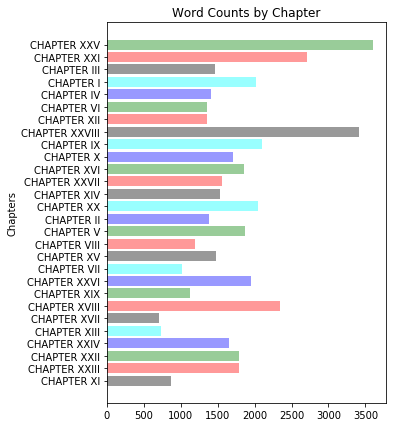

,ChapterName,ChapterContent,WordCount
0,CHAPTER XI,CHAPTER XI\n\nSilence ensued. The countess loo...,873.0
1,CHAPTER XXIII,CHAPTER XXIII\n\nPierre well knew this large r...,1783.0
2,CHAPTER XXII,CHAPTER XXII\n\nWhile these conversations were...,1795.0
3,CHAPTER XXIV,CHAPTER XXIV\n\nThere was now no one in the re...,1658.0
4,CHAPTER XIII,CHAPTER XIII\n\nWhen Natasha ran out of the dr...,726.0
5,CHAPTER XVII,CHAPTER XVII\n\nAfter Anna Mikhaylovna had dri...,707.0
6,CHAPTER XVIII,"CHAPTER XVIII\n\n\n\n\nCountess Rostova, with ...",2348.0
7,CHAPTER XIX,CHAPTER XIX\n\nAt the men's end of the table t...,1124.0
8,CHAPTER XXVI,CHAPTER XXVI\n\nThe gray-haired valet was sitt...,1954.0
9,CHAPTER VII,CHAPTER VII\n\nThe rustle of a woman's dress w...,1015.0


In [7]:
# import matplotlib as mpl
# # Just making the plots look better
# mpl.style.use('ggplot')

my_colors = 'rgbkymc'

plt.figure(figsize=(5,7))
# plt.rcParams["figure.figsize"] = [16,9]
plt.ylabel('Chapters')
plt.title('Word Counts by Chapter')

# plt.bar(df.WordCount, df.ChapterName)
opacity = 0.4

df['WordCount'] = word_count.tolist()
plt.barh(df.ChapterName, df.WordCount, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
# plt.barh(df.ChapterName, df.WordCount, color= my_colors)

plt.show()


# df = df.drop('wordCount', 1)


df.head(30)


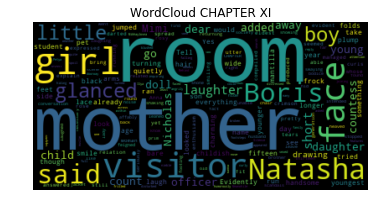

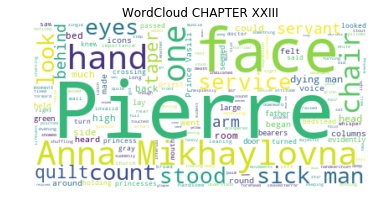

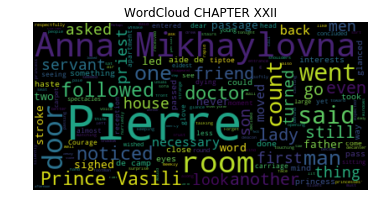

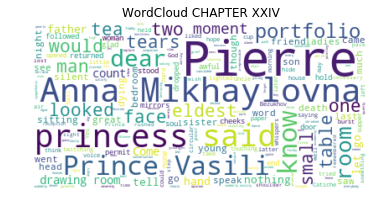

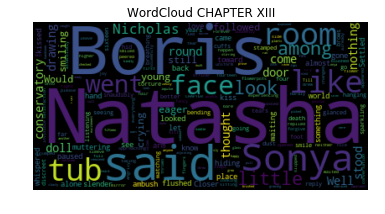

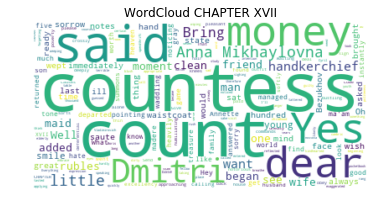

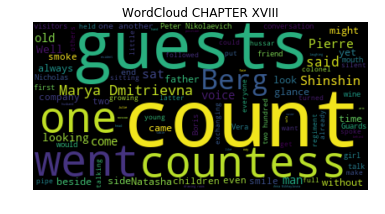

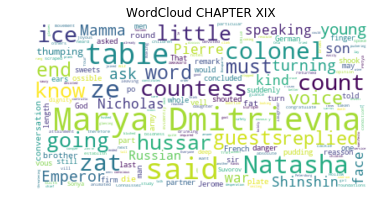

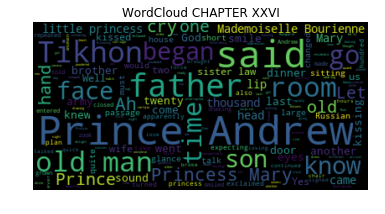

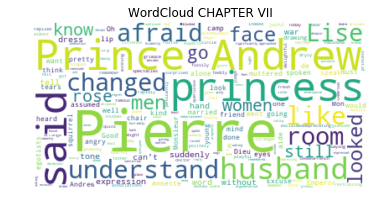

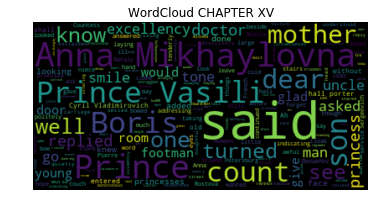

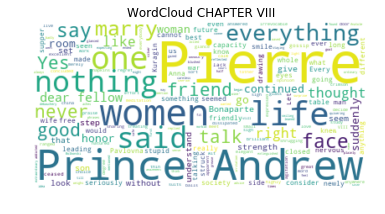

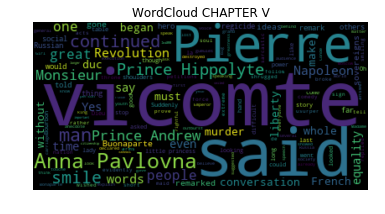

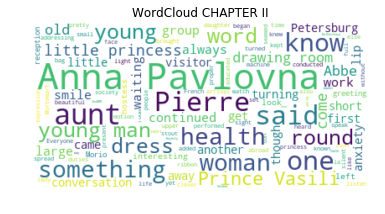

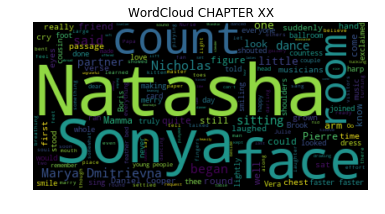

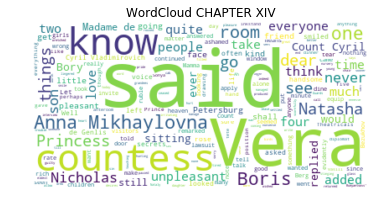

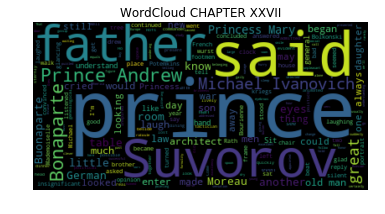

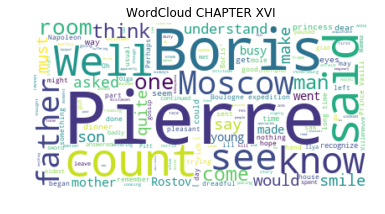

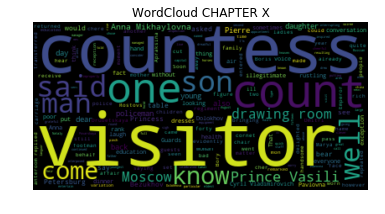

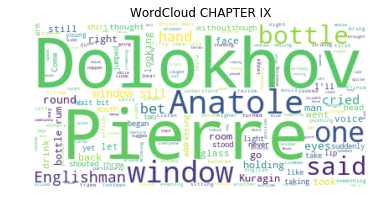

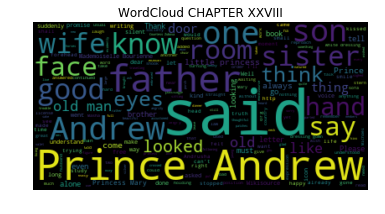

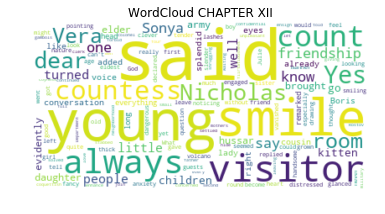

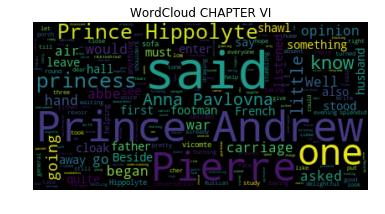

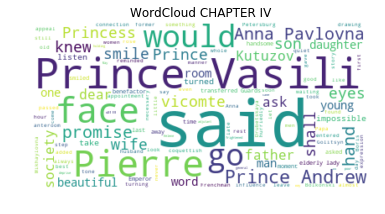

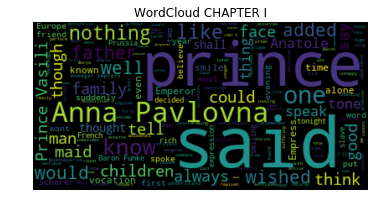

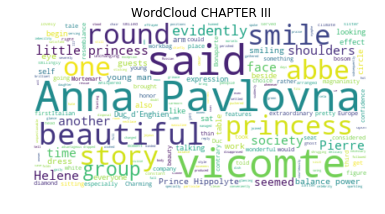

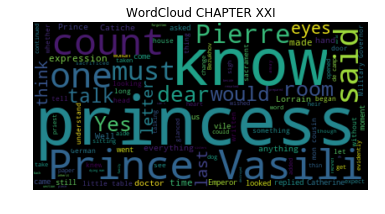

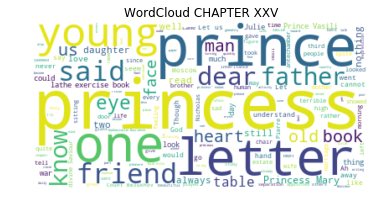

In [12]:
# WordClouds - show most frequently occuring words, with higher frequency words corelating to high font size
# generating wordCloud showing the most frequently occurring words per Chapter 
color_flag = True
chapter_count = 0
for text in df['ChapterContent']:
    if color_flag:
        wordcloud = WordCloud(stopwords=stop_words).generate(text)
    else:
        wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
    # Display the generated image:
    plt.title("WordCloud " + df['ChapterName'][chapter_count])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    color_flag = not color_flag
    chapter_count = chapter_count + 1

### Phrase Distribution
Performing Phrase distribution(s) throughout the whole book and then for individual Chapter(s).

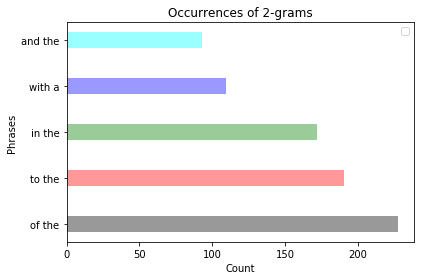

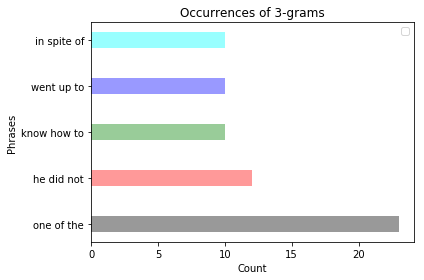

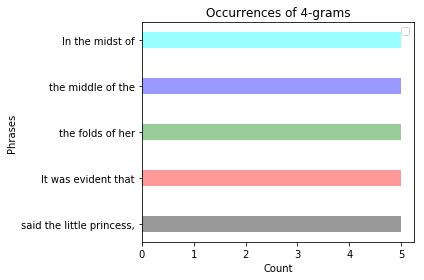

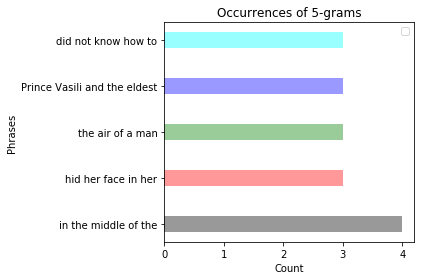

In [14]:
# data = df['ChapterContent'][0]

# Phrase distribution(s) throughout the whole book
data = ''.join(txt)
all_counts = dict()
# counting till n-grams, n ranging from 2..5 
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    fig, ax = plt.subplots()

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()

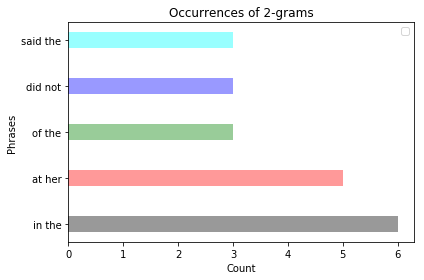

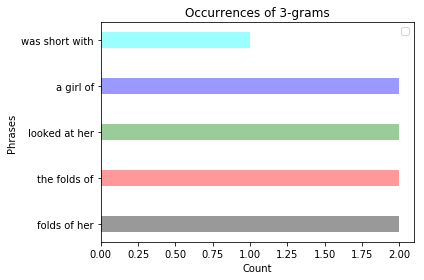

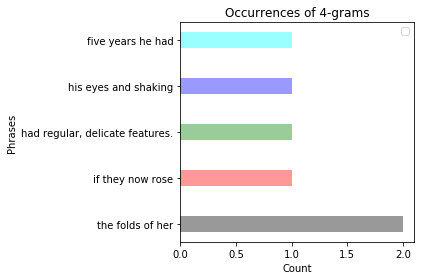

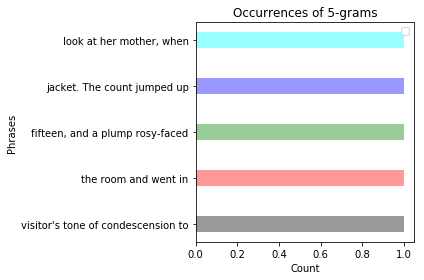

In [16]:
# Phrase distribution(s) throughout individual Chapters, eg. Chapter XI 
data = df['ChapterContent'][0]
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()


## NOTE:
The process of **Stop Word removal** happens next, as "phrase" distribution should be done with stop words
taken into account.

In [19]:
def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens

#tokenize
%time tokenized_text = [tokenize_and_stopWordsRemoval(text) for text in txt]

CPU times: user 826 ms, sys: 0 ns, total: 826 ms
Wall time: 821 ms


In [20]:
print len(tokenized_text)
print tokenized_text[11]
print txt[11]

2676
['Heavens', 'virulent', 'attack', 'replied', 'prince', 'least', 'disconcerted', 'reception', 'entered', 'wearing', 'embroidered', 'court', 'uniform', 'knee', 'breeches', 'shoes', 'stars', 'breast', 'serene', 'expression', 'flat', 'face', 'spoke', 'refined', 'French', 'grandfathers', 'spoke', 'thought', 'gentle', 'patronizing', 'intonation', 'natural', 'man', 'importance', 'grown', 'old', 'society', 'court', 'went', 'Anna', 'Pavlovna', 'kissed', 'hand', 'presenting', 'bald', 'scented', 'shining', 'head', 'complacently', 'seated', 'sofa']
"Heavens! what a virulent attack!" replied the prince, not in the least disconcerted by this reception. He had just entered, wearing an embroidered court uniform, knee breeches, and shoes, and had stars on his breast and a serene expression on his flat face. He spoke in that refined French in which our grandfathers not only spoke but thought, and with the gentle, patronizing intonation natural to a man of importance who had grown old in society and

## Name and Place Identification
This can be achieved by **Named Entity Recognition (NER)**. Here I first utilize **Spacy** for this purpose but after seeing quiet a few exceptions in the results, I have also shown the same task using NLTK's NER. 
Top 10 results for both the categories(Name of people and places) are shown below. 

In [102]:
import spacy
nlp = spacy.load('en')

doc_str = ""
for item in tokenized_text:
    doc_str = doc_str + " " + " ".join(item)

doc = nlp(doc_str.decode('utf-8'))    
print type(doc)
# print([(X.text, X.label_) for X in doc.ents])

list_person = []
list_place = []

for X in doc.ents:
    if (X.label_ == u'PERSON'):
        list_person.append((X.text, X.label_))
    elif (X.label_ == u'GPE')| (X.label_ == u'LOC') :
        list_place.append((X.text, X.label_))

# Set operation on lists to remove the duplicate entries
list_person = list(set(list_person))
list_place = list(set(list_place))

# printing first 10 items in each category
print list_person[:10]
print list_place[:10]

<type 'spacy.tokens.doc.Doc'>
[(u'Anna Mikhaylovna Shinshin Berg', u'PERSON'), (u'Ochakov', u'PERSON'), (u'Emperor Alexander', u'PERSON'), (u'Princess Drubetskaya', u'PERSON'), (u'Sparrow Hills', u'PERSON'), (u'Kiss', u'PERSON'), (u'Prince Nicholas', u'PERSON'), (u'Michael Ilarionovich', u'PERSON'), (u'Lise Take', u'PERSON'), (u'Helene Prince Vasili', u'PERSON')]
[(u'Europe', u'LOC'), (u'Hercules', u'GPE'), (u' Very', u'LOC'), (u'Natasha', u'GPE'), (u' Now', u'LOC'), (u'Fifty', u'GPE'), (u'Moscow', u'GPE'), (u'Sonya', u'GPE'), (u'Whom', u'GPE'), (u' Countess Apraksina', u'LOC')]


In [104]:
nltk_personList = []
nltk_placeList = []

import nltk
for sent in nltk.sent_tokenize(doc_str):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            if (chunk.label() == 'PERSON'):
                nltk_personList.append((chunk.label(), ' '.join(c[0] for c in chunk)))
            elif (chunk.label() == 'GPE'):
                nltk_placeList.append((chunk.label(), ' '.join(c[0] for c in chunk)))

# Set operation on lists to remove the duplicate entries
nltk_personList = list(set(nltk_personList))
nltk_placeList = list(set(nltk_placeList))

# printing first 10 items in each category
print nltk_personList[:10]
print nltk_placeList[:10]

[('PERSON', 'Andrew Bolkonski'), ('PERSON', 'Count Cyril Vladimirovich Bezukhov Countess Rostova'), ('PERSON', 'Either'), ('PERSON', 'Annette'), ('PERSON', 'Worldly'), ('PERSON', 'Moyka Canal'), ('PERSON', 'Julie Natasha'), ('PERSON', 'Bonaparte Julie Karagina'), ('PERSON', 'Cossack Marya Dmitrievna'), ('PERSON', 'Boris Natalya Ilynichna')]
[('GPE', 'Russia'), ('GPE', 'Pierre'), ('GPE', 'Europe'), ('GPE', 'Corsican'), ('GPE', 'Novosiltsev'), ('GPE', 'Boris'), ('GPE', 'Moscow Petersburg'), ('GPE', 'Lise'), ('GPE', 'Hippolyte'), ('GPE', 'European')]


## Sentiment Ananlysis
Here I attempt to get the sentiment of each line in the whole document based on **NLTK's Vader Analyzer**. 
In order to keep the task simplistic, I am refraining from training a Neural network architecture (LSTM or CNN)
for this, as it will need the training to be done on some other labelled data set and then utilize transfer learning to work on this  piece of text.

Instead I use NLTK, and label sentences polarity based on the polarity score of it's individual words.
The sentiment scoring consists of 4 tags : Neu, Neg, Pos and compound. The first three represent the sentiment score percentage of each category in our sentence, and the compound single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

I have considered sentences with a compound value greater than 0.2 as positive and less than -0.2 as negative. The **label** column in data frame refers to the sentiment of the sentence, 0 being neutral, +1 positive and -1 negative respectively. 

In [148]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

sentiments = []
for text in txt[:10]:
    for sent in nltk.sent_tokenize(text):
        print sent
        print(vader_analyzer.polarity_scores(sent))
        sent_dic = vader_analyzer.polarity_scores(sent)
        sent_dic["sentence"] = sent
        sentiments.append(sent_dic)

df_sentiments = pd.DataFrame.from_records(sentiments)

df_sentiments['label'] = 0
df_sentiments.loc[df_sentiments['compound'] > 0.2, 'label'] = 1
df_sentiments.loc[df_sentiments['compound'] < -0.2, 'label'] = -1
df_sentiments.head()

df_sentiments.head(10)

CHAPTER I
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
"Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
But I warn you, if you don't tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist--I really believe he is Antichrist--I will have nothing more to do with you and you are no longer my friend, no longer my 'faithful slave,' as you call yourself!
{'neg': 0.202, 'neu': 0.708, 'pos': 0.09, 'compound': -0.7644}
But how do you do?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I see I have frightened you--sit down and tell me all the news."
{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'compound': -0.4404}
It was in July, 1805, and the speaker was the well-known Anna Pavlovna Scherer, maid of honor and favorite of the Empress Marya Fedorovna.
{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.7351}
With these words she greeted Prince 

,compound,neg,neu,pos,sentence,label
0,0.0000,0.000,1.000,0.00,CHAPTER I,0
1,0.0000,0.000,1.000,0.00,"""Well, Prince, so Genoa and Lucca are now just...",0
2,-0.7644,0.202,0.708,0.09,"But I warn you, if you don't tell me that this...",-1
3,0.0000,0.000,1.000,0.00,But how do you do?,0
4,-0.4404,0.225,0.775,0.00,I see I have frightened you--sit down and tell...,-1
5,0.7351,0.000,0.780,0.22,"It was in July, 1805, and the speaker was the ...",1
6,0.5574,0.000,0.820,0.18,With these words she greeted Prince Vasili Kur...,1
7,0.0000,0.000,1.000,0.00,Anna Pavlovna had had a cough for some days.,0
8,-0.4767,0.129,0.871,0.00,"She was, as she said, suffering from la grippe...",-1
9,0.0000,0.000,1.000,0.00,"All her invitations without exception, written...",0


Positive sentences:

['It was in July, 1805, and the speaker was the well-known Anna Pavlovna Scherer, maid of honor and favorite of the Empress Marya Fedorovna.',
 'With these words she greeted Prince Vasili Kuragin, a man of high rank and importance, who was the first to arrive at her reception.',
 '"If you have nothing better to do, Count [or Prince], and if the prospect of spending an evening with a poor invalid is not too terrible, I shall be very charmed to see you tonight between 7 and 10- Annette Scherer."']

Negative sentences:

["But I warn you, if you don't tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist--I really believe he is Antichrist--I will have nothing more to do with you and you are no longer my friend, no longer my 'faithful slave,' as you call yourself!",
 'I see I have frightened you--sit down and tell me all the news."',
 'She was, as she said, suffering from la grippe; grippe being then a new word i

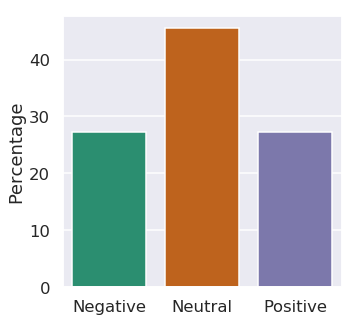

In [168]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

# printing first 5 positive sentences from the dataframe
print("Positive sentences:\n")
pprint (list(df_sentiments[df_sentiments['label'] == 1].sentence)[:5], width=200)

# printing first 5 negative sentences from the dataframe
print("\nNegative sentences:\n")
pprint (list(df_sentiments[df_sentiments['label'] == -1].sentence)[:5], width=200)

fig, ax = plt.subplots(figsize=(5, 5))

counts = df_sentiments.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Text Summarizer
Here I am creating summary of each Chapter, using **Gensim's summarizer**. This summarizer is based on **TextRank algorithm** which is losely similar to PageRank algorithm used by Google. Text is converted to graph with  vertices and edges and the more a sentence is linked by other sentence the higher it's score grows. Summary is generated by top high scoring sentences. 

In [180]:
print type(df.ChapterContent[0])

chapter_count = 0
for text in df['ChapterContent']:
    # Display the generated Chapterwise summary:
    print ('Summary:%s' % df['ChapterName'][chapter_count])
    summary = summarize(df.ChapterContent[chapter_count]) 
    print (summarize(df.ChapterContent[chapter_count]))
    print
    print "Length of original text %d, length of summary %d characters." % (len(df['ChapterContent'][chapter_count]), len(summary))
    print
    chapter_count = chapter_count + 1

<type 'str'>
Summary:CHAPTER XI
The visitor's daughter was already smoothing down her dress with an inquiring look at her mother, when suddenly from the next room were heard the footsteps of boys and girls running to the door and the noise of a chair falling over, and a girl of thirteen, hiding something in the folds of her short muslin frock, darted in and stopped short in the middle of the room.
Escaping from her father she ran to hide her flushed face in the lace of her mother's mantilla--not paying the least attention to her severe remark--and began to laugh.
"Now then, go away and take your monstrosity with you," said the mother, pushing away her daughter with pretended sternness, and turning to the visitor she added: "She is my youngest girl."
Natasha, raising her face for a moment from her mother's mantilla, glanced up at her through tears of laughter, and again hid her face.
"Tell me, my dear," said she to Natasha, "is Mimi a relation of yours?
Meanwhile the younger generation:

There was now no one in the reception room except Prince Vasili and the eldest princess, who were sitting under the portrait of Catherine the Great and talking eagerly.
"Catiche has had tea served in the small drawing room," said Prince Vasili to Anna Mikhaylovna.
Pierre went with Anna Mikhaylovna into the small drawing room.
Pierre well remembered this small circular drawing room with its mirrors and little tables.
During balls given at the house Pierre, who did not know how to dance, had liked sitting in this room to watch the ladies who, as they passed through in their ball dresses with diamonds and pearls on their bare shoulders, looked at themselves in the brilliantly lighted mirrors which repeated their reflections several times.
He looked inquiringly at his monitress and saw that she was again going on tiptoe to the reception room where they had left Prince Vasili and the eldest princess.
Anna Mikhaylovna was standing beside the princess, and they were both speaking in excited w

Prince Andrew got out of the carriage, helped his little wife to alight, and let her pass into the house before him.
Prince Andrew apparently knew this as well as Tikhon; he looked at his watch as if to ascertain whether his father's habits had changed since he was at home last, and, having assured himself that they had not, he turned to his wife.
Let us go across to Mary's room," he said.
The little princess had grown stouter during this time, but her eyes and her short, downy, smiling lip lifted when she began to speak just as merrily and prettily as ever.
"You've grown older, Tikhon," he said in passing to the old man, who kissed his hand.
You are Mademoiselle Bourienne," said the little princess, kissing her.
Prince Andrew stopped and made a grimace, as if expecting something unpleasant.
When Prince Andrew went in the two princesses, who had only met once before for a short time at his wedding, were in each other's arms warmly pressing their lips to whatever place they happened to 

Prince Andrew looked Anna Pavlovna straight in the face with a sarcastic smile.
I do not speak of Russia," said the vicomte, polite but hopeless: "The sovereigns, madame...
Prince Hippolyte, who had been gazing at the vicomte for some time through his lorgnette, suddenly turned completely round toward the little princess, and having asked for a needle began tracing the Conde coat of arms on the table.
"If Buonaparte remains on the throne of France a year longer," the vicomte continued, with the air of a man who, in a matter with which he is better acquainted than anyone else, does not listen to others but follows the current of his own thoughts, "things will have gone too far.
Pierre wished to make a remark, for the conversation interested him, but Anna Pavlovna, who had him under observation, interrupted:
"That is doubtful," said Prince Andrew.
"Bonaparte has said so," remarked Prince Andrew with a sarcastic smile.
If to some people," he went on, turning to Anna Pavlovna, "he ever was

At the appointed hour the prince, powdered and shaven, entered the dining room where his daughter-in-law, Princess Mary, and Mademoiselle Bourienne were already awaiting him together with his architect, who by a strange caprice of his employer's was admitted to table though the position of that insignificant individual was such as could certainly not have caused him to expect that honor.
"How thoroughly like him that is!" he said to Princess Mary, who had come up to him.
The prince stood still; his lively glittering eyes from under their thick, bushy eyebrows sternly scanned all present and rested on the little princess.
"Ho, ho!" said the old man, casting his eyes on her rounded figure.
The prince asked her about her father, and she began to smile and talk.
"Countess Apraksina, poor thing, has lost her husband and she has cried her eyes out," she said, growing more and more lively.
As she became animated the prince looked at her more and more sternly, and suddenly, as if he had studie

The thought immediately occurred to him that his promise to Prince Andrew was of no account, because before he gave it he had already promised Prince Anatole to come to his gathering; "besides," thought he, "all such 'words of honor' are conventional things with no definite meaning, especially if one considers that by tomorrow one may be dead, or something so extraordinary may happen to one that honor and dishonor will be all the same!" Pierre often indulged in reflections of this sort, nullifying all his decisions and intentions.
Reaching the large house near the Horse Guards' barracks, in which Anatole lived, Pierre entered the lighted porch, ascended the stairs, and went in at the open door.
"I bet on Dolokhov!" cried a third.
Another voice, from a man of medium height with clear blue eyes, particularly striking among all these drunken voices by its sober ring, cried from the window: "Come here; part the bets!" This was Dolokhov, an officer of the Semenov regiment, a notorious gambl

"Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes.
But I warn you, if you don't tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist--I really believe he is Antichrist--I will have nothing more to do with you and you are no longer my friend, no longer my 'faithful slave,' as you call yourself!
It was in July, 1805, and the speaker was the well-known Anna Pavlovna Scherer, maid of honor and favorite of the Empress Marya Fedorovna.
"If you have nothing better to do, Count [or Prince], and if the prospect of spending an evening with a poor invalid is not too terrible, I shall be very charmed to see you tonight between 7 and 10- Annette Scherer."
Can one be calm in times like these if one has any feeling?" said Anna Pavlovna.
I must put in an appearance there," said the prince.
"If they had known that you wished it, the entertainment would have been put off," said the prince, who, like a wound-up cloc

At Bald Hills, Prince Nicholas Andreevich Bolkonski's estate, the arrival of young Prince Andrew and his wife was daily expected, but this expectation did not upset the regular routine of life in the old prince's household.
General in Chief Prince Nicholas Andreevich (nicknamed in society, "the King of Prussia") ever since the Emperor Paul had exiled him to his country estate had lived there continuously with his daughter, Princess Mary, and her companion, Mademoiselle Bourienne.
Although he was in retirement and had now no influence in political affairs, every high official appointed to the province in which the prince's estate lay considered it his duty to visit him and waited in the lofty antechamber ante chamber just as the architect, gardener, or Princess Mary did, till the prince appeared punctually to the appointed hour.
Everyone sitting in this antechamber experienced the same feeling of respect and even fear when the enormously high study door opened and showed the figure of a